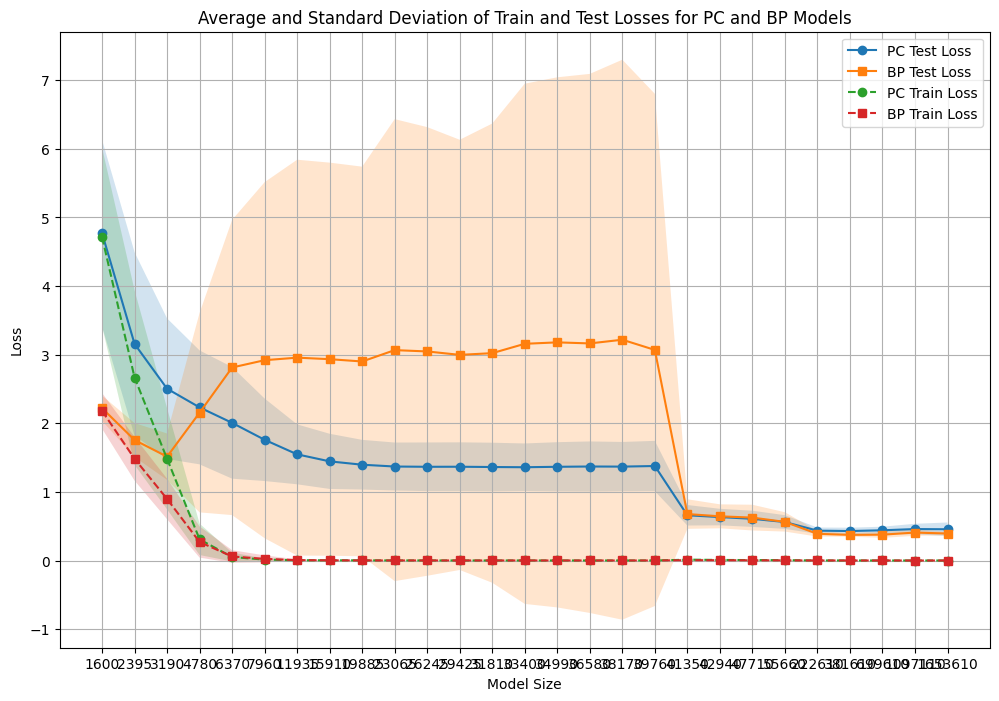

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    plt.figure(figsize=(12, 8))

    plt.plot(model_sizes_pc, mean_test_pc, label='PC Test Loss', linestyle='-', marker='o')
    plt.fill_between(model_sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2)

    plt.plot(model_sizes_bp, mean_test_bp, label='BP Test Loss', linestyle='-', marker='s')
    plt.fill_between(model_sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2)

    plt.plot(model_sizes_pc, mean_train_pc, label='PC Train Loss', linestyle='--', marker='o')
    plt.fill_between(model_sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2)

    plt.plot(model_sizes_bp, mean_train_bp, label='BP Train Loss', linestyle='--', marker='s')
    plt.fill_between(model_sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2)

    plt.xlabel('Model Size')
    plt.ylabel('Loss')
    plt.title('Average and Standard Deviation of Train and Test Losses for PC and BP Models')
    plt.legend()
    plt.grid(True)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


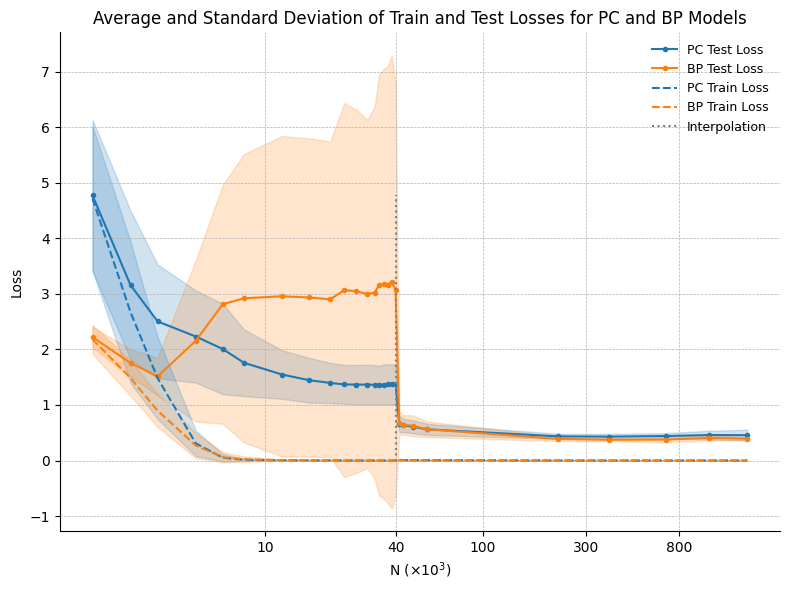

In [4]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2, color="C1")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=0, ymax=max(max(mean_test_pc), max(mean_test_bp)), linestyle="dotted", color="gray", label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black")
    plt.ylabel("Loss", color="black")
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", color="black")
    legend = ax.legend(frameon=False, fontsize=9)
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


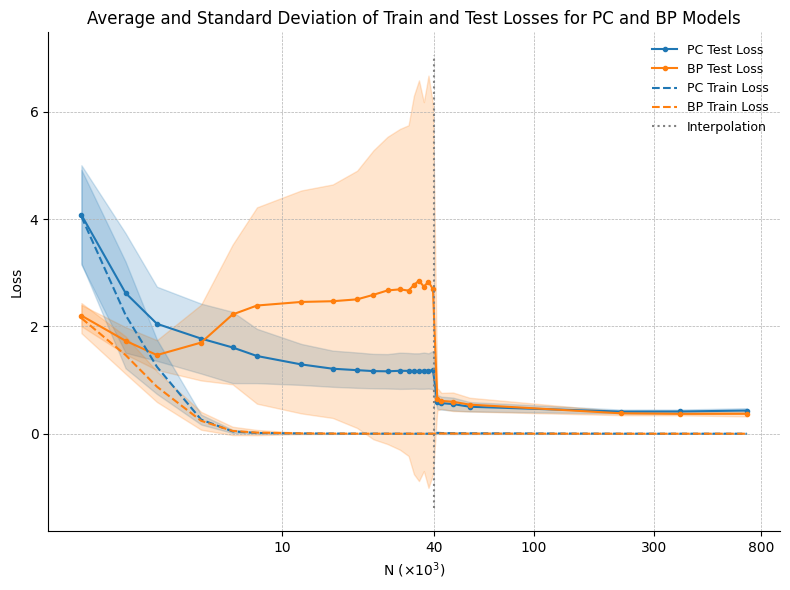

In [6]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith('epochs_1000_') or f.startswith('epochs_500_'))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2, color="C1")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="gray", label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black")
    plt.ylabel("Loss", color="black")
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", color="black")
    legend = ax.legend(frameon=False, fontsize=9)
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


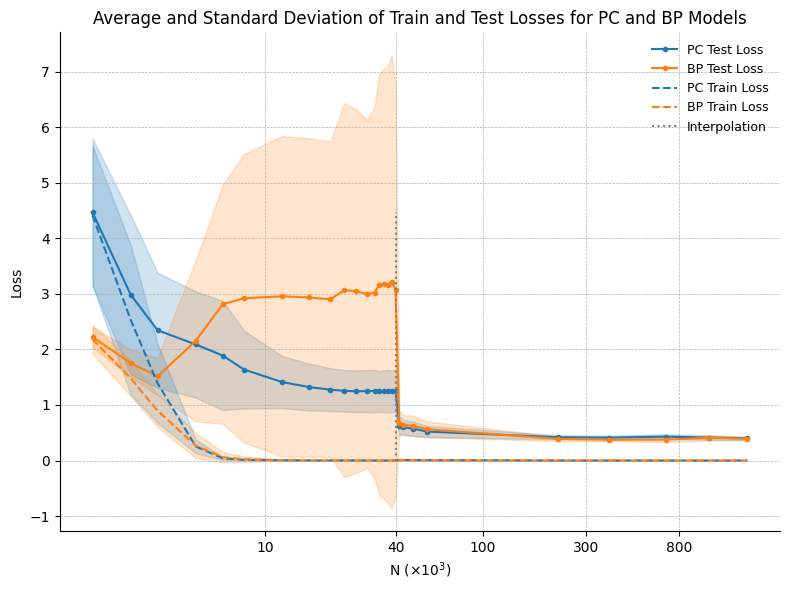

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2, color="C1")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=0, ymax=max(max(mean_test_pc), max(mean_test_bp)), linestyle="dotted", color="gray", label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black")
    plt.ylabel("Loss", color="black")
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", color="black")
    legend = ax.legend(frameon=False, fontsize=9)
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


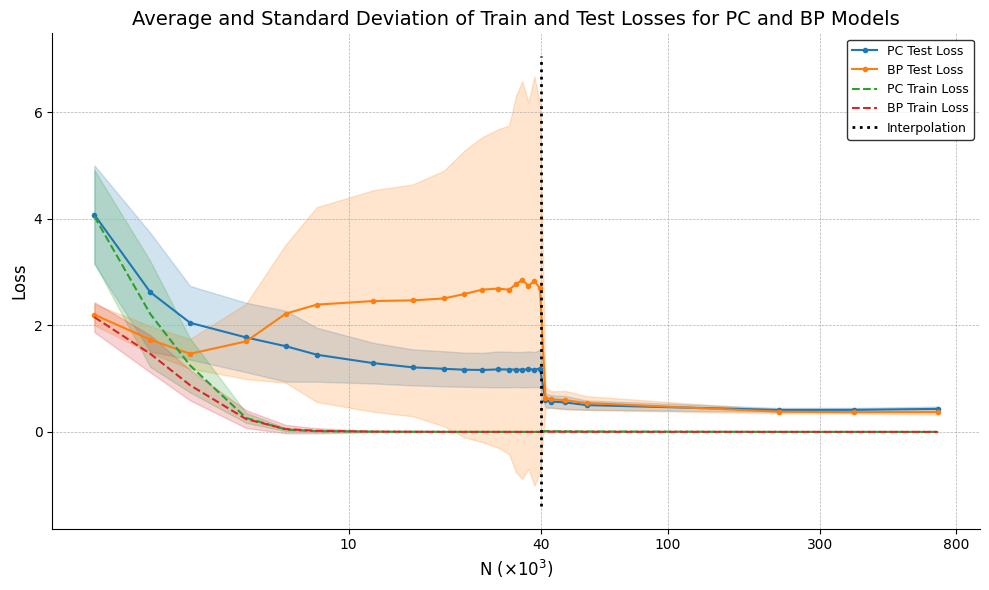

In [8]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=12)
    plt.ylabel("Loss", color="black", fontsize=12)
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", color="black", fontsize=14)
    legend = ax.legend(frameon=True, fontsize=9, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


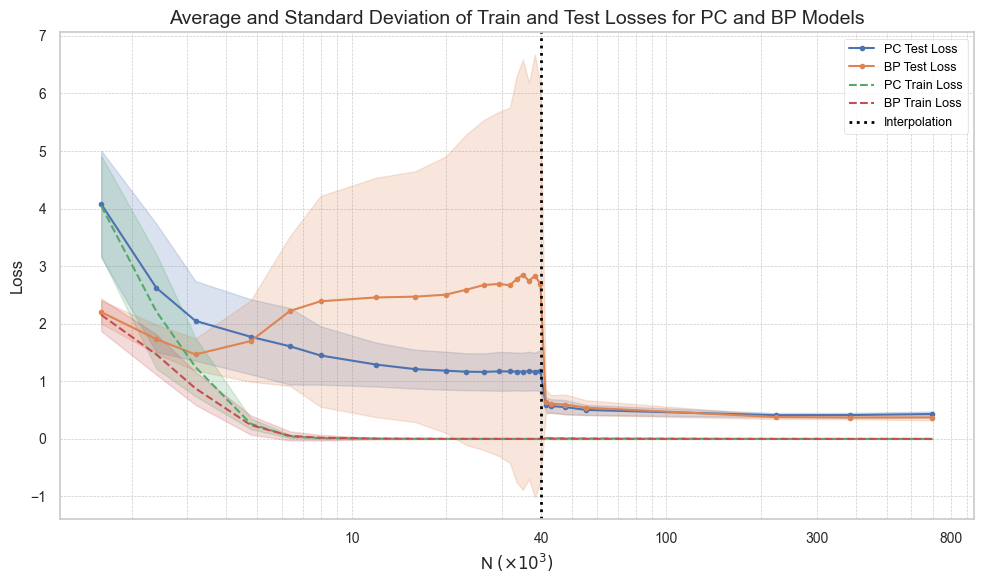

In [9]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    plt.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    plt.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2, color="C0")

    plt.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    plt.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2, color="C1")

    plt.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    plt.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2, color="C2")

    plt.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    plt.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2, color="C3")

    plt.axvline(x=interpolation_threshold, ymin=0, ymax=1, linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    plt.xlabel(r"N $(\times 10^3)$", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", fontsize=14)
    
    legend = plt.legend(frameon=True, fontsize=9, loc='best', edgecolor='lightgrey')
    plt.setp(legend.get_texts(), color="black")
    legend.get_frame().set_linewidth(0.5)
    legend.get_frame().set_alpha(0.8)

    plt.xticks([10, 40, 100, 300, 800], fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.gca().xaxis.get_major_formatter().set_scientific(False)
    plt.gca().xaxis.get_major_formatter().set_useOffset(False)
    
    plt.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


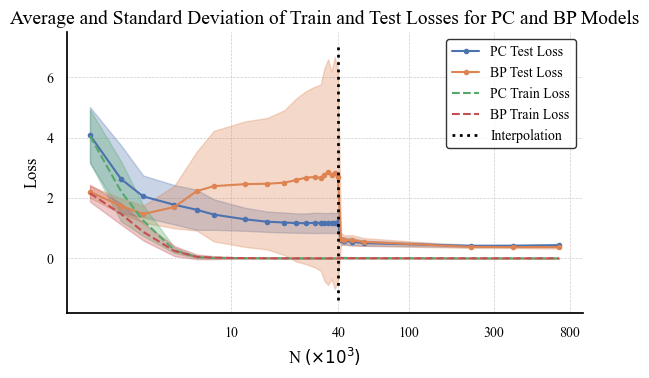

In [11]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.3, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.3, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.3, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black")
    plt.ylabel("Loss", color="black")
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", color="black")
    legend = ax.legend(frameon=True, fontsize=10, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


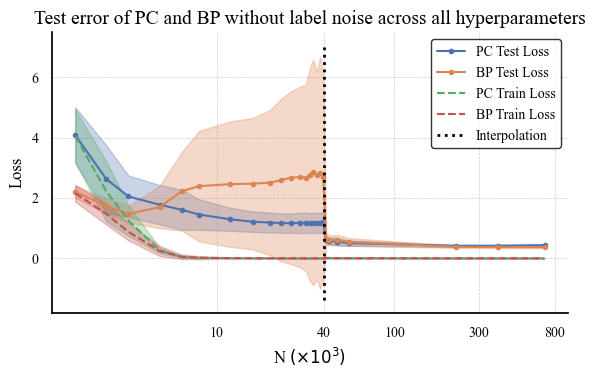

In [13]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.3, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.3, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.3, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=12)
    plt.ylabel("Loss", color="black", fontsize=12)
    plt.title("Test error of PC and BP without label noise across all hyperparameters", color="black", fontsize=14)
    legend = ax.legend(frameon=True, fontsize=10, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("test_error_pc_bp_no_noise_all_hyperparameters.pdf", dpi=300, bbox_inches='tight')

    plt.show()


# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


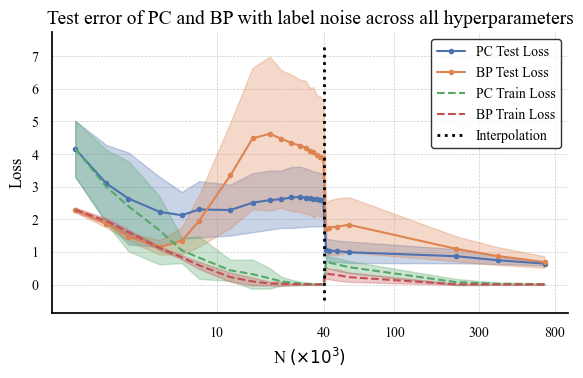

In [14]:
# now create the same plot again but for different noise levels namely 0.2
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.3, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.3, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.3, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=12)
    plt.ylabel("Loss", color="black", fontsize=12)
    plt.title("Test error of PC and BP with label noise across all hyperparameters", color="black", fontsize=14)
    legend = ax.legend(frameon=True, fontsize=10, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("test_error_pc_bp_noise_0.2_all_hyperparameters.pdf", dpi=300, bbox_inches='tight')

    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.2')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.2')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)



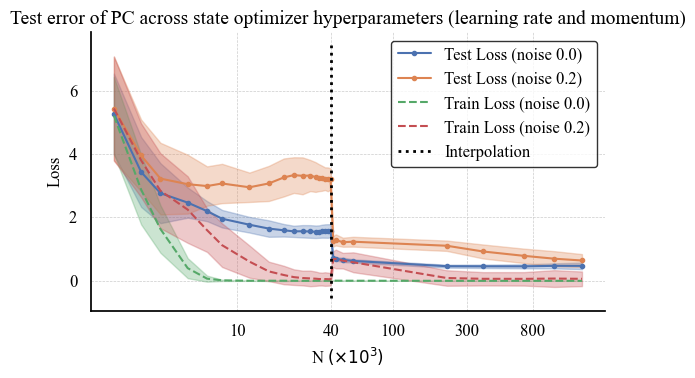

In [18]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_noise_0, std_losses_noise_0, mean_losses_noise_2, std_losses_noise_2, mean_train_losses_noise_0, std_train_losses_noise_0, mean_train_losses_noise_2, std_train_losses_noise_2):
    model_sizes_noise_0 = sorted(mean_losses_noise_0.keys(), key=int)
    model_sizes_noise_2 = sorted(mean_losses_noise_2.keys(), key=int)

    mean_test_noise_0 = [mean_losses_noise_0[size] for size in model_sizes_noise_0]
    std_test_noise_0 = [std_losses_noise_0[size] for size in model_sizes_noise_0]

    mean_test_noise_2 = [mean_losses_noise_2[size] for size in model_sizes_noise_2]
    std_test_noise_2 = [std_losses_noise_2[size] for size in model_sizes_noise_2]

    mean_train_noise_0 = [mean_train_losses_noise_0[size] for size in model_sizes_noise_0]
    std_train_noise_0 = [std_train_losses_noise_0[size] for size in model_sizes_noise_0]

    mean_train_noise_2 = [mean_train_losses_noise_2[size] for size in model_sizes_noise_2]
    std_train_noise_2 = [std_train_losses_noise_2[size] for size in model_sizes_noise_2]

    sizes_noise_0 = [int(size) / 1e3 for size in model_sizes_noise_0]
    sizes_noise_2 = [int(size) / 1e3 for size in model_sizes_noise_2]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12
    })

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.semilogx(sizes_noise_0, mean_test_noise_0, ".-", label="Test Loss (noise 0.0)", color="C0")
    ax.fill_between(sizes_noise_0, np.array(mean_test_noise_0) - np.array(std_test_noise_0), np.array(mean_test_noise_0) + np.array(std_test_noise_0), alpha=0.3, color="C0")

    ax.semilogx(sizes_noise_2, mean_test_noise_2, ".-", label="Test Loss (noise 0.2)", color="C1")
    ax.fill_between(sizes_noise_2, np.array(mean_test_noise_2) - np.array(std_test_noise_2), np.array(mean_test_noise_2) + np.array(std_test_noise_2), alpha=0.3, color="C1")

    ax.semilogx(sizes_noise_0, mean_train_noise_0, "--", label="Train Loss (noise 0.0)", color="C2")
    ax.fill_between(sizes_noise_0, np.array(mean_train_noise_0) - np.array(std_train_noise_0), np.array(mean_train_noise_0) + np.array(std_train_noise_0), alpha=0.3, color="C2")

    ax.semilogx(sizes_noise_2, mean_train_noise_2, "--", label="Train Loss (noise 0.2)", color="C3")
    ax.fill_between(sizes_noise_2, np.array(mean_train_noise_2) - np.array(std_train_noise_2), np.array(mean_train_noise_2) + np.array(std_train_noise_2), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=12)
    plt.ylabel("Loss", color="black", fontsize=12)
    plt.title("Test error of PC across state optimizer hyperparameters (learning rate and momentum)", color="black", fontsize=14)
    legend = ax.legend(frameon=True, fontsize=12, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("test_error_pc_hparams_analysis.pdf", dpi=300, bbox_inches='tight')
    
    plt.show()

# Path to the directory containing the JSON files
dir_pc = 'data/results_hparams_pc/two_layer_nn/CrossEntropyLoss'

# Load losses from files
test_losses_noise_0, train_losses_noise_0 = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_noise_2, train_losses_noise_2 = load_losses_from_files(dir_pc, 'noise_0.2')

# Compute mean and standard deviation for test losses
mean_test_losses_noise_0, std_test_losses_noise_0 = compute_mean_and_std(test_losses_noise_0)
mean_test_losses_noise_2, std_test_losses_noise_2 = compute_mean_and_std(test_losses_noise_2)

# Compute mean and standard deviation for train losses
mean_train_losses_noise_0, std_train_losses_noise_0 = compute_mean_and_std(train_losses_noise_0)
mean_train_losses_noise_2, std_train_losses_noise_2 = compute_mean_and_std(train_losses_noise_2)

# Plot the losses
plot_losses(mean_test_losses_noise_0, std_test_losses_noise_0, mean_test_losses_noise_2, std_test_losses_noise_2, mean_train_losses_noise_0, std_train_losses_noise_0, mean_train_losses_noise_2, std_train_losses_noise_2)
